In [225]:
import numpy as np
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import mplhep
import matplotlib.colors as mcolors
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

mplhep.style.use(mplhep.style.CMS)

In [2]:
def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)

In [3]:
fdir = "/Users/alexcampbell/Documents/Research/Fermilab/TID/Chip7F_data"
fnames = list(np.sort(glob.glob(f"{fdir}/report*.json")))
all_files = fnames.copy()

In [596]:
data = [jsonload(fname) for fname in fnames]

for i in range(len(data)):
    if data[i] == None:
        data.remove(data[i])

In [597]:
voltages = []
frequencies = [39,40,41]
for j in range(len(data)):
    for i in range (len(data[j]['tests'])):
        if "metadata" in data[j]['tests'][i]:
            voltages.append(data[j]['tests'][i]['metadata']['voltage'])
            
spare1_asic = dict.fromkeys(list(np.unique(np.array(frequencies))))
spare1_emu = dict.fromkeys(list(np.unique(np.array(frequencies))))
for key in spare1_asic.keys():
    spare1_asic[key] = dict.fromkeys(list(np.unique(np.array(voltages))))
    spare1_emu[key] = dict.fromkeys(list(np.unique(np.array(voltages))))


volts = list(np.unique(np.array(voltages)))

for volt in volts:
    for freq in frequencies:
        spare1_asic_list = []
        spare1_emu_list = []
        for j in range(len(data)):
            for i in range (len(data[j]['tests'])):
                if "metadata" in data[j]['tests'][i]:
                    if f'test_TID.py::test_streamCompareLoop[{volt}-{freq}]' in data[j]['tests'][i]['nodeid']:
                        spare1_emu_list.append(data[j]['tests'][i]['metadata']['spare1_emu'])
                        spare1_asic_list.append(data[j]['tests'][i]['metadata']['spare1_asic'])
                                          
        for i in range(len(spare1_asic_list)):
            for j in range(len(spare1_asic_list[0])):
                spare1_emu_list[i][j] = [f"{int(x):08x}" for x in spare1_emu_list[i][j]]
                spare1_asic_list[i][j] = [f"{int(x):08x}" for x in spare1_asic_list[i][j]]
                        
        spare1_asic[freq][volt] = spare1_asic_list
        spare1_emu[freq][volt] = spare1_emu_list

                

spare1_asic_diffs = dict.fromkeys(list(np.unique(np.array(frequencies))))
for key in spare1_asic_diffs.keys():
    spare1_asic_diffs[key] = dict.fromkeys(list(np.unique(np.array(voltages))))
    
for freq in frequencies:
    for volt in volts:
        diffs = []
        for i in range(len(spare1_asic[freq][volt])):
            if spare1_asic[freq][volt][i] != spare1_emu[freq][volt][i]:
                diffs.append(i)
        spare1_asic_diffs[freq][volt] = diffs
        spare1_emu_diffs[freq][volt] = diffs

for freq in frequencies:
    for volt in volts:
        spare1_asic[freq][volt] = np.array(spare1_asic[freq][volt])
        spare1_emu[freq][volt] = np.array(spare1_emu[freq][volt])
        
spare1_asic_loc = dict.fromkeys(list(np.unique(np.array(frequencies))))
for key in spare1_asic_loc.keys():
    spare1_asic_loc[key] = dict.fromkeys(list(np.unique(np.array(voltages))))

for freq in frequencies:
    for volt in volts:
        for vals in spare1_asic_diffs[freq][volt]:
            rows = []
            columns = []
            tot = []
            for i in range(len(spare1_asic[freq][volt][0])):
                for j in range(len(spare1_asic[freq][volt][0][0])):
                    if spare1_asic[freq][volt][vals][i][j] != spare1_emu[freq][volt][vals][i][j]:
                        rows.append(i)
                        columns.append(j)
                tot.append([rows,columns])
            spare1_asic_loc[freq][volt] = tot

In [595]:
for freq in frequencies:
    for volt in volts:
        diffs = []
        for i in range(len(spare1_asic[40][1.20])):
            if spare1_asic[freq][volt][i] != spare1_emu[freq][volt][i]:
                diffs.append(i)
        spare1_asic_diffs[freq][volt] = diffs
        spare1_emu_diffs[freq][volt] = diffs

TypeError: object of type 'NoneType' has no len()

In [598]:
for freq in frequencies:
    for volt in volts:
        spare1_asic[freq][volt] = np.array(spare1_asic[freq][volt])
        spare1_emu[freq][volt] = np.array(spare1_emu[freq][volt])

In [600]:
for vals in spare1_asic_diffs[40][1.20]:
  

IndentationError: expected an indented block (3318028532.py, line 2)

In [601]:
voltages = []
frequencies = [39,40,41]
for j in range(len(data)):
    for i in range (len(data[j]['tests'])):
        if "metadata" in data[j]['tests'][i]:
            voltages.append(data[j]['tests'][i]['metadata']['voltage'])
            
spare1_asic_loc = dict.fromkeys(list(np.unique(np.array(frequencies))))

for key in spare1_asic_loc.keys():
    spare1_asic_loc[key] = dict.fromkeys(list(np.unique(np.array(voltages))))
    spare1_emu_loc[key] = dict.fromkeys(list(np.unique(np.array(voltages))))


In [ ]:
['7e124020', '15f40889', '67c76e8d', 'e087a09b', '00b124b2',
        'f3359017'],

In [648]:
for i in range(3564):
    print(f'{i:04d}   {"/".join(spare1_emu[40][1.08][6][i])}   {"/".join(spare1_asic[40][1.08][6][i])}') 

0000   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0001   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0002   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0003   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0004   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0005   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0006   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0007   55555500/55555500/55555500/55555500/55555500/55555500   55555500/55555500/55555500/55555500/55555500/55555500
0008   55555500/55555500/55555500/55555500/55555500/55555500   5

IndexError: index 200 is out of bounds for axis 0 with size 200

In [622]:
spare1_emu[39][1.26][113][158] 

array(['7e124020', '15f40889', '67c76e8d', 'e087a09b', '00b114f0',
       'f3355015'], dtype='<U8')

In [351]:
spare1_asic_

{39: {1.08: [5],
  1.11: [17, 56, 71, 85],
  1.14: [65, 90, 129],
  1.2: [3],
  1.26: [1, 2, 64, 113, 121],
  1.29: [20],
  1.32: [12, 38, 78, 151]},
 40: {1.08: [6, 59, 70, 112, 138, 149, 151, 153, 154],
  1.11: [29, 123, 140],
  1.14: [7, 32, 62, 86, 95],
  1.2: [92],
  1.26: [17],
  1.29: [16, 42],
  1.32: [32, 59]},
 41: {1.08: [0, 20, 48, 75, 100, 133],
  1.11: [10, 20, 107],
  1.14: [70, 72, 114, 115, 118],
  1.2: [67],
  1.26: [69, 79, 100, 149],
  1.29: [3, 86, 109],
  1.32: [7, 52]}}

In [602]:
for freq in frequencies:
    for volt in volts:
        tot = []
        for vals in spare1_asic_diffs[freq][volt]:
            rows = []
            columns = []
            for i in range(len(spare1_asic[freq][volt][0])):
                for j in range(len(spare1_asic[freq][volt][0][0])):
                    if spare1_asic[freq][volt][vals][i][j] != spare1_emu[freq][volt][vals][i][j]:
                        rows.append(i)
                        columns.append(j)
            tot.append([rows,columns])
        spare1_asic_loc[freq][volt] = tot
                    

In [502]:
len(spare1_asic_loc[40][1.32][0][1])

200

In [603]:
spare1_results= dict.fromkeys(list(np.unique(np.array(frequencies))))

for key in spare1_results.keys():
    spare1_results[key] = dict.fromkeys(list(np.unique(np.array(voltages))))
    
for freq in frequencies:
    for volt in volts:
        spare1_results[freq][volt] = dict.fromkeys(list({
                                        'PLL Disagreement Start Position': None, 'PLL Disagreement Length': None, 'PLL # of eTx disagreements': None, 'PLL # of Disagreements': None,
                                        'RF Disagreement Start Position': None, 'RF # of eTx disagreements': None, 'RF # of Disagreements': None}))
    

In [540]:
spare1_results

{39: {1.08: {'PLL Disagreement Start Position': None,
   'PLL Disagreement Length': None,
   'PLL # of eTx disagreements': None,
   'PLL # of Disagreements': None,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': None},
  1.11: {'PLL Disagreement Start Position': None,
   'PLL Disagreement Length': None,
   'PLL # of eTx disagreements': None,
   'PLL # of Disagreements': None,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': None},
  1.14: {'PLL Disagreement Start Position': None,
   'PLL Disagreement Length': None,
   'PLL # of eTx disagreements': None,
   'PLL # of Disagreements': None,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': None},
  1.2: {'PLL Disagreement Start Position': None,
   'PLL Disagreement Length': None,
   'PLL # of eTx disagreements': None,
   'PLL # of Disagreements': None,
   'RF Di

In [604]:
spare1_asic_loc[40][1.08][-1][0][1] == spare1_asic_loc[40][1.08][-1][0][2]

True

In [611]:
spare1_asic_loc[39][1.26][3][0]

[158, 158, 193, 193, 193, 193, 193, 193]

In [593]:
spare1_asic[39][1.26] == spare1_emu[39][1.26]

array([[[ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ Tr

In [589]:
spare1_emu[39][1.26][3][193]

array(['8eba509a', '8421688b', '919e02ac', '02e52d23', 'f6032943',
       '14240250'], dtype='<U8')

In [639]:
spare1_asic_loc[40][1.08][0][0]

[158,
 158,
 185,
 185,
 185,
 186,
 186,
 186,
 186,
 186,
 186,
 187,
 187,
 187,
 187,
 187,
 187,
 188,
 188,
 188,
 188,
 188,
 188,
 189,
 189,
 189,
 189,
 189,
 189,
 190,
 190,
 190,
 190,
 190,
 190,
 191,
 191,
 191,
 191,
 191,
 191,
 192,
 192,
 192,
 192,
 192,
 192,
 193,
 193,
 193,
 193,
 193,
 193]

In [628]:
for freq in frequencies:
    for volt in volts:
        pll_unlock = 0
        random_flips_list = []
        
        start_position = []
        length = []
        pll_etx = []
        for i in range(len(spare1_asic_loc[freq][volt])):
            ntimes = 0
            random_flips = 0
            etx_num = []
            position = []
            etx_num1 = 0
            for j in range(len(spare1_asic_loc[freq][volt][i][0])-1):
                if spare1_asic_loc[freq][volt][i][0][j] + 1 == spare1_asic_loc[freq][volt][i][0][j+1]:
                    ntimes +=1
                    position.append(spare1_asic_loc[freq][volt][i][0][j])
                elif (spare1_asic_loc[freq][volt][i][0][j+1] != spare1_asic_loc[freq][volt][i][0][j] + 1):
                    if (spare1_asic_loc[freq][volt][i][0][j+1] != spare1_asic_loc[freq][volt][i][0][j]):
                        random_flips +=1
                elif (spare1_asic_loc[freq][volt][i][0][j+1] != spare1_asic_loc[freq][volt][i][0][j] + 1):
                    if (spare1_asic_loc[freq][volt][i][0][j+1] != spare1_asic_loc[freq][volt][i][0][j]):
                        random_flips +=1
                    
                elif (spare1_asic_loc[freq][volt][i][0][j+1] == spare1_asic_loc[freq][volt][i][0][j]):
                    if spare1_asic_loc[freq][volt][i][1][j+1] > spare1_asic_loc[freq][volt][i][1][j]:
                        etx_num1 +=1
                    else:
                        etx_num1 = 0
                print(etx_num1)
            random_flips_list.append(random_flips)            
            if etx_num1 >=3:
                pll_etx.append(etx_num1)

            if ntimes >= 3:
                pll_unlock +=1
            else:
                position.append(None)
            length.append(ntimes)
            start_position.append(position[0])
    
        spare1_results[freq][volt]['PLL # of Disagreements'] = pll_unlock
        spare1_results[freq][volt]['PLL Disagreement Start Position'] = start_position
        spare1_results[freq][volt]['PLL Disagreement Length'] = length
        spare1_results[freq][volt]['PLL # of eTx disagreements'] = pll_etx
        spare1_results[freq][volt]['RF # of Disagreements'] = random_flips_list
    
                
            

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


2

In [627]:
spare1_results

{39: {1.08: {'PLL Disagreement Start Position': [173],
   'PLL Disagreement Length': [20],
   'PLL # of eTx disagreements': [],
   'PLL # of Disagreements': 1,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': [1]},
  1.11: {'PLL Disagreement Start Position': [158, 185, 158, 158],
   'PLL Disagreement Length': [35, 8, 35, 35],
   'PLL # of eTx disagreements': [],
   'PLL # of Disagreements': 4,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': [0, 1, 0, 0]},
  1.14: {'PLL Disagreement Start Position': [158, 158, 182],
   'PLL Disagreement Length': [35, 35, 11],
   'PLL # of eTx disagreements': [],
   'PLL # of Disagreements': 3,
   'RF Disagreement Start Position': None,
   'RF # of eTx disagreements': None,
   'RF # of Disagreements': [0, 0, 1]},
  1.2: {'PLL Disagreement Start Position': [183],
   'PLL Disagreement Length': [10],
   'PLL # of eTx disagreements': [],
 

In [ ]:
spare1_asic[67][:] == spare1_emu[67][:]

In [304]:
for i in range(len(spare1_asic[0])):
    for j in range(len(spare1_asic[0][0])):
        if spare1_asic[3][i][j] != spare1_emu[3][i][j]:
            print(f"{i},{j} {spare1_asic[3][i][j]} {spare1_emu[3][i][j]}")

158,4 00b11ccd 00b11cc4
158,5 f335901b f3341004
183,0 21800b65 800b6518
183,1 094513c4 1413c421
183,2 9815b003 9815b015
184,0 15680819 6808196c
184,1 c4201eff 201eff15
184,2 21400394 400394c4
184,3 f416e006 16e00621
184,4 07dc8d13 dc8d13f4
184,5 1854a254 54a25407
185,0 11d41370 fc11d412
185,1 20991284 d4137016
185,2 0490a103 64128411
185,3 3ba3d6e6 0490a112
185,4 e02f0a9e 3ba3d6e6
185,5 6c000000 e02f0a9e
186,0 749c0f4d d838d48e
186,1 20d4043b 0f4d2413
186,2 71781530 043b749c
186,3 387cbb02 153020d4
186,4 12c014ac 7cbb15e0
186,5 16fc11d4 c014ac38
187,0 d473a820 fc9b59ce
187,1 023d2913 e0288c1a
187,2 4af89c96 73a8209a
187,3 8c04e1ab 14a413d4
187,4 38d48e13 ab389c96
187,5 240270f6 138c04e1
188,0 fca90210 8b11e403
188,1 03c8b006 14a83d00
188,2 17581350 142c1460
188,3 fc9b59ce fca9134c
188,4 e0288c1a 03c8b006
188,5 9a000000 17581350
189,0 05297412 008b0809
189,1 131c14b0 97137438
189,2 7903dc88 8854d7fc
189,3 008b030c 7412ac13
189,4 6014a83d 14b00529
189,5 d3142c14 dc88131c
190,0 44893f80 2

In [305]:
for i in range(180,199,1):
    print(f"{i}, {spare1_asic[3][i]} {spare1_emu[3][i]}")

180, ['03acac04' '16ec12cc' 'e4ec14f8' '18121009' '6f178817' 'c9960331'] ['03acac04' '16ec12cc' 'e4ec14f8' '18121009' '6f178817' 'c9960331']
181, ['a313a408' '2cbe3864' '02715102' '760388d1' '16ac0301' '74861454'] ['a313a408' '2cbe3864' '02715102' '760388d1' '16ac0301' '74861454']
182, ['be4b1840' 'f906067c' '0224ac23' 'b5ce9e07' 'e025868f' 'b9190000'] ['be4b1840' 'f906067c' '0224ac23' 'b5ce9e07' 'e025868f' 'b9190000']
183, ['21800b65' '094513c4' '9815b003' '14a02441' '13201278' '9e3f54a0'] ['800b6518' '1413c421' '9815b015' '14a02441' '13201278' '9e3f54a0']
184, ['15680819' 'c4201eff' '21400394' 'f416e006' '07dc8d13' '1854a254'] ['6808196c' '201eff15' '400394c4' '16e00621' 'dc8d13f4' '54a25407']
185, ['11d41370' '20991284' '0490a103' '3ba3d6e6' 'e02f0a9e' '6c000000'] ['fc11d412' 'd4137016' '64128411' '0490a112' '3ba3d6e6' 'e02f0a9e']
186, ['749c0f4d' '20d4043b' '71781530' '387cbb02' '12c014ac' '16fc11d4'] ['d838d48e' '0f4d2413' '043b749c' '153020d4' '7cbb15e0' 'c014ac38']
187, ['d473a8

In [77]:
bit_flips = []
for i in range(len(spare1_asic)):
    for j in range(len(spare1_asic[0])):
        for k in range(len(spare1_asic[0][0])):
            for l in range(32):
                if ((spare1_asic[i][j][k])>>l & 0b1) != ((spare1_emu[i][j][k])>>l & 0b1):
                    bit_flips.append(l)
                    #print(f'{bin(spare1_asic[i][j][k])} {bin(spare1_emu[i][j][k])}')
bit_flips = np.array(bit_flips)            

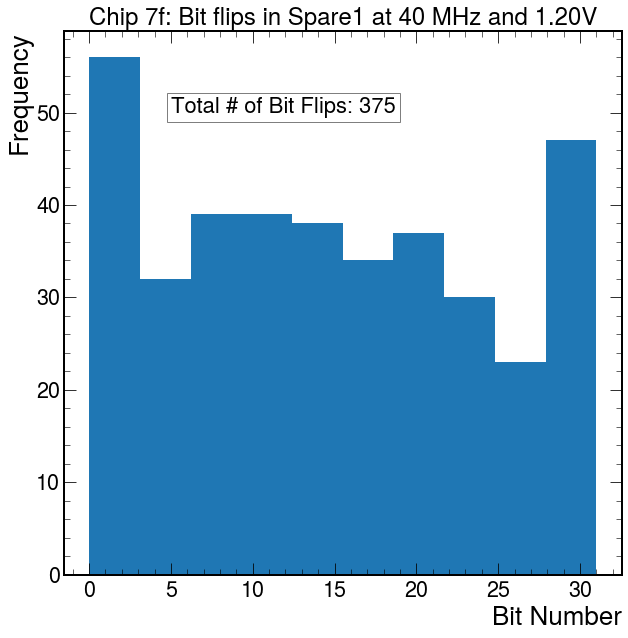

In [80]:
plt.hist(bit_flips)
plt.xlabel("Bit Number")
plt.text(5, 50, f'Total # of Bit Flips: {len(bit_flips)}', fontsize=22, bbox=dict(facecolor='w', alpha=0.5))
plt.ylabel("Frequency")
plt.title("Chip 7f: Bit flips in Spare1 at 40 MHz and 1.20V",fontsize =24)
plt.savefig('./7f_40_1_2V_bitflips.jpg')